# Аттрактор Лоренца

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def lorenz(x, y, z, sigma = 10, rho = 28, beta = 2.667):
    x_der = sigma * (y - x)
    y_der = x * (rho - z) - y
    z_der = x * y - beta * z
    return x_der, y_der, z_der

##  Задача №1. Простое решение

<br>
<font size=4> 
Система
</font>
<br>
<br>
$
\Large
\begin{cases}
   \dot{x} = \sigma (y - x), 
   \\
   \dot{y} = x (\rho - z) - y,
   \\
   \dot{z} = x y - \beta z
 \end{cases}\normalsize
 $
<br>
<font size=4> 
Стандартные значения - $\sigma=10, \rho=28, \beta=2.667$
</font>
<br>

__Требования__:
- Не использовать интеграторы и массивы numpy, точки высчитывать в цикле
- Начальные данные - $(0., 1., 1.01)$
- Количество точек - $10^4$
- Подписать рисунок и оси
- label со значениями $\sigma=10, \rho=28, \beta=2.667$


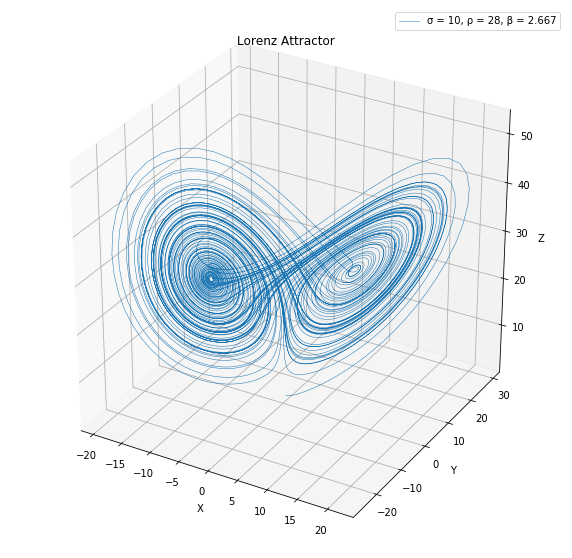

In [2]:
num_steps = 10 ** 4
dt = 0.01
xs = [0.]
ys = [1.]
zs = [1.01]

for i in range(num_steps):
    x_der, y_der, z_der = lorenz(xs[i], ys[i], zs[i])
    xs.append(xs[i] + x_der * dt)
    ys.append(ys[i] + y_der * dt)
    zs.append(zs[i] + z_der * dt)
    
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')

ax.plot(xs, ys, zs, lw = 0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(['\u03C3 = 10, \u03C1 = 28, \u03B2 = 2.667'])
ax.set_title("Lorenz Attractor")

plt.show();

##  Задача №2. Чуть сложнее

Аттрактор Лоренца, но другие требования:

- Использовать numpy массивы, не использовать интегрирование из scipy
- Начальные данные - $(0., 1., 1.01)$
- Количество точек - $10^4$
- Для вычисления очередной точки использовать специальную функцию `lorenz(...)`, причем
    - `lorenz(x, y, z)` считает производные при стандартных значениях $\sigma=10, \rho=28, \beta=2.667$
    - если нужны другие значения $\sigma, \rho, \beta$, то вызывать можно только как `lorenz(x, y, z, sigma=..., beta=..., rho=...)`
- Подписать рисунок и оси
- label со значениями $\sigma, \rho, \beta$, для которых построена фигура

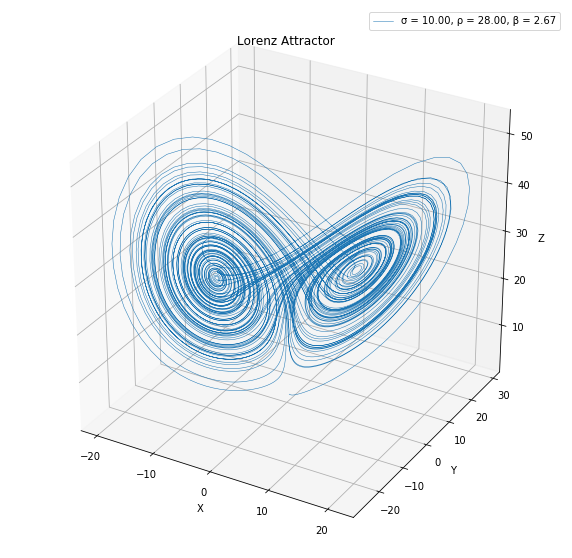

In [3]:
num_steps = 10 ** 4
dt = 0.01

sigma = 10
rho = 28
beta = 2.667

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)
xs[0], ys[0], zs[0] = (0., 1., 1.05)

for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], sigma = sigma, rho = rho, beta = beta)
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)
    
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')

ax.plot(xs, ys, zs, lw = 0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(['\u03C3 = %4.2f, \u03C1 = %4.2f, \u03B2 = %4.2f' %(sigma, rho, beta)])
ax.set_title("Lorenz Attractor")

plt.show();

##  Задача №3. Сложнее, но короче

Аттрактор Лоренца, но требования опять поменялись:

- Использовать numpy массивы и интегрирование из scipy (odeint)
- Начальные данные - $(0., 1., 1.01)$
- Временной интервал - $0...100$
- Количество точек - $10^4$
- Для вычисления очередной точки использовать специальную функцию `lorenz(...)`, причем первый аргумент - кортеж из трех точек; остальное - как в _задаче №2_ (может что-то ещё понадобится, посмотрите сигнатуру `odeint`)
- Подписать рисунок и оси
- label со значениями $\sigma, \rho, \beta$, для которых построена фигура

In [4]:
def lorenz_odient(X, t, sigma, beta, rho):
    x, y, z = X
    x_der = sigma * (y - x)
    y_der = x * (rho - z) - y
    z_der = x * y - beta * z
    return x_der, y_der, z_der

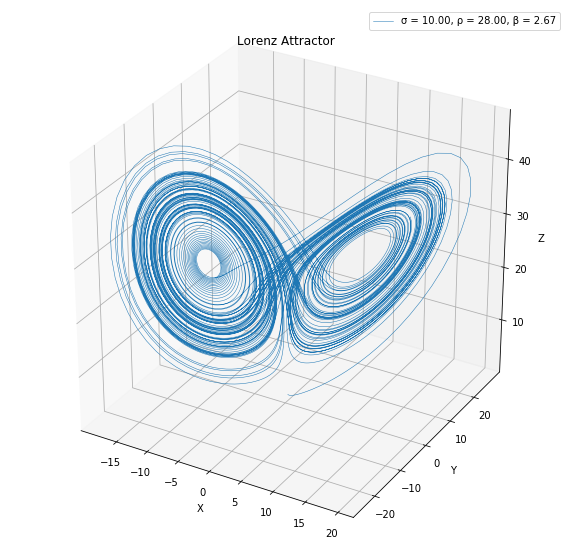

In [5]:
tmax, num_steps = 100, 10 ** 4

sigma, rho, beta = 10, 28, 2.667
x0, y0, z0 = 0., 1., 1.01

t = np.linspace(0, tmax, num_steps)
f = odeint(lorenz_odient, (x0, y0, z0), t, args = (sigma, beta, rho))
xs, ys, zs = f.T

fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw = 0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(['\u03C3 = %4.2f, \u03C1 = %4.2f, \u03B2 = %4.2f' %(sigma, rho, beta)])
ax.set_title("Lorenz Attractor")

plt.show();

## Задача №6

- сгенерируйте список чисел от 1 до произвольного числа $n$ от 5 до 9 включительно
- сделайте из него массив numpy
- сгенерируйте случайное число $m$ от 2 до 4 включительно
- верните массив numpy в следующей формы: $[1, 0, ..., 0, 2, 0, ..., 0, 3, ... , n, 0, ... , 0]$, где количество нулей между числами равно $m$
- преобразуйте полученный массив в двумерный массив так, чтобы в первом столбце были числа $1,2, ... , n$, остальные - $0$

In [6]:
from random import randint

In [7]:
def create_array(n, m):
    l = list(range(1, n+1))
    arr = np.array(l)

    for i in range(n):
        arr = np.insert(arr, i * m + i + 1, [0] * m)
    return arr

In [8]:
n = randint(5, 9)
m = randint(2, 4)

a = create_array(n, m).reshape(n, m+1)
a

array([[1, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [3, 0, 0, 0, 0],
       [4, 0, 0, 0, 0],
       [5, 0, 0, 0, 0],
       [6, 0, 0, 0, 0],
       [7, 0, 0, 0, 0],
       [8, 0, 0, 0, 0],
       [9, 0, 0, 0, 0]])